In [3]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [4]:
df = pd.read_csv("parole1.1.csv")

In [5]:
df.head()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0


In [6]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               738 non-null    int64  
 1   race               738 non-null    int64  
 2   age                738 non-null    float64
 3   state              738 non-null    int64  
 4   time.served        738 non-null    float64
 5   max.sentence       738 non-null    int64  
 6   multiple.offenses  738 non-null    int64  
 7   crime              738 non-null    int64  
 8   violator           738 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.0 KB


In [7]:
df.nunique()

male                   2
race                   2
age                  317
state                  4
time.served           93
max.sentence          17
multiple.offenses      2
crime                  4
violator               2
dtype: int64

In [8]:
df.columns

Index(['male', 'race', 'age', 'state', 'time.served', 'max.sentence',
       'multiple.offenses', 'crime', 'violator'],
      dtype='object')

# DataType conversion

In [9]:
df['male'] = df['male'].astype(object)
df["race"]= df['race'].astype(object)
df["multiple.offenses"] = df['multiple.offenses'].astype(object)
df["crime"]=df['crime'].astype(object)
df['violator']=df['violator'].astype(object)
df['state']=df['state'].astype(object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               738 non-null    object 
 1   race               738 non-null    object 
 2   age                738 non-null    float64
 3   state              738 non-null    object 
 4   time.served        738 non-null    float64
 5   max.sentence       738 non-null    int64  
 6   multiple.offenses  738 non-null    object 
 7   crime              738 non-null    object 
 8   violator           738 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 52.0+ KB


In [12]:
df_encode = pd.get_dummies(df,drop_first=True)

In [13]:
list(df_encode)

['age',
 'time.served',
 'max.sentence',
 'male_1',
 'race_2',
 'state_2',
 'state_3',
 'state_4',
 'multiple.offenses_1',
 'crime_2',
 'crime_3',
 'crime_4',
 'violator_1']

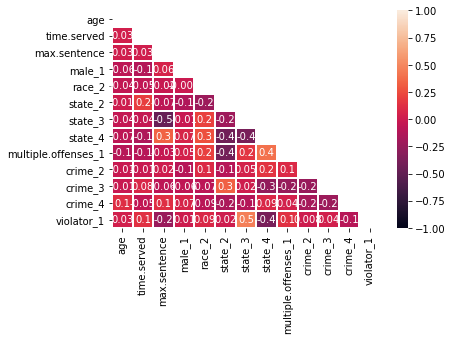

In [15]:
sns.heatmap(data=df_encode.corr(),annot=True,fmt=".1g",vmax=1,vmin=-1,linewidths=1,mask=np.triu(df_encode.corr()))
plt.show()

In [16]:
x=df_encode.drop('violator_1',axis=1)
y = df_encode['violator_1']


In [17]:
VIF = pd.DataFrame()
VIF["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF["columns"]=x.columns
VIF.round(0)

,VIF,columns
0,10.0,age
1,6.0,time.served
2,15.0,max.sentence
3,5.0,male_1
4,2.0,race_2
5,2.0,state_2
6,2.0,state_3
7,4.0,state_4
8,3.0,multiple.offenses_1
9,1.0,crime_2


In [19]:
x = x.drop("max.sentence",axis =1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [21]:
model=LogisticRegression(n_jobs=-1)
model.fit(x_train,y_train)

LogisticRegression(n_jobs=-1)

In [23]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
model.intercept_

array([-3.43228365])

In [25]:
model.coef_

array([[ 0.00502746,  0.19343056,  0.43038913,  0.53240084,  0.45782466,
         1.0898562 , -2.68990233,  1.38463515, -0.14007213, -0.34510348,
        -0.37044813]])

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0], dtype=uint8)

In [28]:
predictprobability = model.predict_proba(x_test)

In [30]:
print(predictprobability)

[[0.53919192 0.46080808]
 [0.49530758 0.50469242]
 [0.95764711 0.04235289]
 [0.9887507  0.0112493 ]
 [0.98924878 0.01075122]
 [0.99250568 0.00749432]
 [0.99532154 0.00467846]
 [0.45249969 0.54750031]
 [0.95661875 0.04338125]
 [0.98258163 0.01741837]
 [0.98595661 0.01404339]
 [0.85718128 0.14281872]
 [0.9581731  0.0418269 ]
 [0.95585312 0.04414688]
 [0.90307823 0.09692177]
 [0.93951988 0.06048012]
 [0.94160356 0.05839644]
 [0.97551724 0.02448276]
 [0.98950906 0.01049094]
 [0.95916678 0.04083322]
 [0.96517091 0.03482909]
 [0.71070051 0.28929949]
 [0.59125545 0.40874455]
 [0.84122026 0.15877974]
 [0.96039968 0.03960032]
 [0.96594422 0.03405578]
 [0.99149706 0.00850294]
 [0.76397237 0.23602763]
 [0.98860502 0.01139498]
 [0.67880039 0.32119961]
 [0.97126884 0.02873116]
 [0.97295283 0.02704717]
 [0.97052754 0.02947246]
 [0.91759031 0.08240969]
 [0.75203597 0.24796403]
 [0.96680686 0.03319314]
 [0.98186087 0.01813913]
 [0.80857826 0.19142174]
 [0.77062689 0.22937311]
 [0.63564688 0.36435312]


In [33]:
metrics.confusion_matrix(y_test,predictions)

array([[167,   5],
       [ 26,  24]], dtype=int64)

In [32]:
x_test.shape,y_test.shape

((222, 11), (222,))

In [35]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       172
           1       0.83      0.48      0.61        50

    accuracy                           0.86       222
   macro avg       0.85      0.73      0.76       222
weighted avg       0.86      0.86      0.85       222



In [37]:
fpr,tpr,thr = metrics.roc_curve(y_test,predictions)
fpr,tpr,thr

(array([0.        , 0.02906977, 1.        ]),
 array([0.  , 0.48, 1.  ]),
 array([2, 1, 0]))

In [38]:
metrics.roc_auc_score(y_test,predictions)

0.7254651162790697

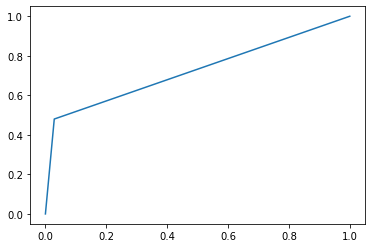

In [39]:
plt.plot(fpr,tpr,label="ROC_AUC")
plt.show()